In [1]:
%pylab inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import experiment_helper as e

import pandas as pd
import seaborn as sns

sns.set_context('talk')
sns.set_style('white')
sns.set(rc={"text.color":"black"})

matplotlib.rcParams['pdf.fonttype'] = 42

# programatically instantiate figures to latex
save_fig = False
#fig_out_dir = # populate to save figures

Populating the interactive namespace from numpy and matplotlib


### This notebook plots the simulated experiments.

# Uncorrelated scores with varying noise

In [2]:
num_full = 5000
n = num_full
feature_dim = 2

num_trials = 100

rho = 0.0


rs = np.random.RandomState(1)
noise_this = (0.,0.)
pop = e.Population(feature_dim, noise=noise_this, correlation=rho, seed=0)
data = pop.get_samples(num_full, noise=noise_this)
X_full, yp, yw = data['X'], data['yp'].ravel(), data['yw'].ravel()

#noise_p = .5
noise_wps = np.array([[0.5, 0.5],
             [1.0, 0.5],
             [2.0, 0.5],
             [2.0, 2.0]])

alphas = np.linspace(0,1,num=101)
util_ps = np.zeros((len(noise_wps), len(alphas), num_trials))
util_ws = np.zeros((len(noise_wps), len(alphas), num_trials))

for k in range(num_trials):
    for i, [noise_w, noise_p] in enumerate(noise_wps):
        fphat = yp + noise_p*rs.randn(len(yp))
        fwhat = yw + noise_w*rs.randn(len(yw))
    
        # pareto frontier
        for j,alpha in enumerate(alphas):
        
            decision_rule = alpha*fwhat + (1-alpha)*fphat > 0 
            util_ps[i,j,k] = np.sum(yp[decision_rule])
            util_ws[i,j,k] = np.sum(yw[decision_rule])
            
utils_p_opt = np.zeros_like(alphas)
utils_w_opt = np.zeros_like(alphas)

for i,alpha in enumerate(alphas):
    decision_rule_opt = alpha*yw + (1-alpha)*yp > 0 
    utils_p_opt[i] = np.sum(yp[decision_rule_opt])
    utils_w_opt[i] = np.sum(yw[decision_rule_opt])
    


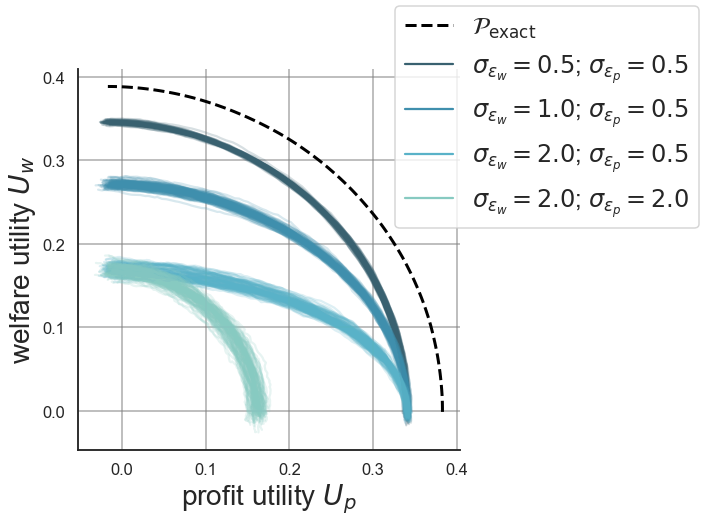

In [3]:
sns.set_context('talk')
sns.set_style('white')

colors = sns.color_palette("GnBu_d", n_colors=len(noise_wps))

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.plot(utils_p_opt/n, utils_w_opt/n, color='black', 
        lw=3,
        ls="--", 
        label=r"${\mathcal{P}}_{\mathrm{exact}}$")#_{\textrm{exact}}$")


colors_noise = ['teal', 'yello']
for i,[noise_w, noise_p] in enumerate(noise_wps):
    ax.plot(util_ps[i]/n, util_ws[i]/n, color=colors[i], alpha=0.2)
    # just for label
    ax.plot([0],[0],color=colors[i], alpha=1.0, label=r"$\sigma_{{\varepsilon_w}} = {0}$; $\sigma_{{\varepsilon_p}} = {1}$".format(
    noise_wps[i][0], noise_wps[i][1]))
    
sns.despine(ax=ax)
ax.set_aspect('equal')

# standardize the tick marks
ax.set_xticks(np.linspace(0,.400,num=5))
ax.set_yticks(np.linspace(0,.400,num=5))

ax.legend(bbox_to_anchor=(.8,.55), prop={'size': 24})

ax.set_xlabel(r"profit utility $U_p$", fontsize=28); 
ax.set_ylabel(r"welfare utility $U_w$", fontsize=28); 

ax.grid(b=True, which='major', linewidth=2, color='gray', alpha=0.5)

ax.set_aspect('equal')
   
if save_fig:
    plt.savefig('{0}/uncorrelated_plus_noise.pdf'.format(fig_out_dir),bbox_inches='tight')

# Uncorrelated scores with fixed and equal noise.

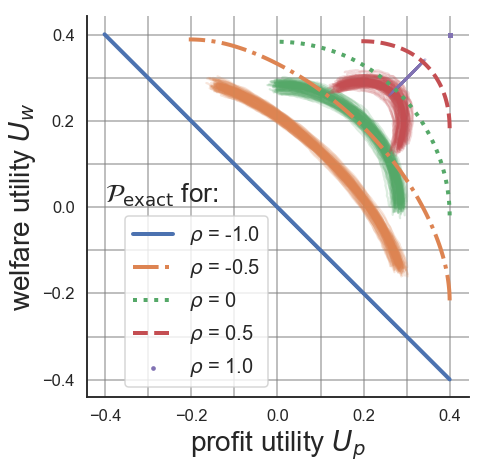

In [4]:
# correlated scores, uncorrelated noise.
num_full = 5000
feature_dim = 2

num_trials = 100

rs = np.random.RandomState(0)
noise_this = (0.,0.)
pop = e.Population(feature_dim, noise=noise_this, correlation=0, seed=0)
data = pop.get_samples(num_full, noise=noise_this)
X_full, yp, yw = data['X'], data['yp'].ravel(), data['yw'].ravel()


noise_p = 1.0
noise_w = 1.0

corrs = [-1.0, -0.5, 0, 0.5, 1.0]

alphas = np.linspace(0,1,num=101)

util_ps = np.zeros((len(corrs), len(alphas), num_trials))
util_ws = np.zeros((len(corrs), len(alphas), num_trials))
    
utils_p_opt = np.zeros((len(corrs), len(alphas)))
utils_w_opt = np.zeros((len(corrs), len(alphas)))
yw_show = []
yp_show = []

line_styles = ['solid', 'dashdot', 'dotted', 'dashed', None]
for i,corr in enumerate(corrs):
    
    pop = e.Population(feature_dim, noise=(0,0), correlation=corr, seed=0)
    
    for k in range(num_trials):
        ## generate finite populations
        feature_dim = 2
        
        # generatinig population data
        data = pop.get_samples(num_full)
        X_full, yp, yw = data['X'], data['yp'].ravel(), data['yw'].ravel()
    
        fphat = yp + noise_p*rs.randn(len(yp))
        fwhat = yw + noise_w*rs.randn(len(yw))
    
        # pareto frontier
        for j,alpha in enumerate(alphas):
        
            decision_rule = alpha*fwhat + (1-alpha)*fphat > 0 
            util_ps[i,j,k] = np.sum(yp[decision_rule])
            util_ws[i,j,k] = np.sum(yw[decision_rule])
            

        for j,alpha in enumerate(alphas):
            decision_rule_opt = alpha*yw + (1-alpha)*yp > 0 
            utils_p_opt[i,j] = np.sum(yp[decision_rule_opt])
            utils_w_opt[i,j] = np.sum(yw[decision_rule_opt])
            
fig, ax = plt.subplots(figsize=(7,7))

colors = sns.color_palette()


n = num_full
for i,corr in enumerate(corrs):    
    ax.plot(util_ps[i]/n, util_ws[i]/n, alpha=0.2,color=colors[i])    
    if i < len(corrs)-1:
        ax.plot(utils_p_opt[i]/n, utils_w_opt[i]/n, 
                lw=4, 
                ls = line_styles[i],
            label=r"$\rho$ = {0}".format(corr),color=colors[i],
                 
           zorder=3)


ax.scatter(utils_p_opt[-1]/n,utils_w_opt[-1]/n, 
           s=10,
           color=colors[len(corrs)-1], label=r"$\rho$ = {0}".format(corrs[-1]))
ax.set_aspect('equal')
sns.despine(ax=ax)

ax.text(-.4, 0.01, r'$\mathcal{P}_{\mathrm{exact}}$ for:', fontsize=26)

ax.legend(bbox_to_anchor=(0.5,0.5), frameon=True, prop={'size': 20})

minor_ticks = np.arange(-.4, .45, .1)
major_ticks = np.arange(-.4, .45, .2)
ax.set_xticks(major_ticks); ax.set_xticks(minor_ticks, minor= True)
ax.set_yticks(major_ticks); ax.set_yticks(minor_ticks, minor= True)

ax.set_xlabel(r"profit utility $U_p$", fontsize=28); 
ax.set_ylabel(r"welfare utility $U_w$", fontsize=28); 

ax.grid(b=True, which='minor', linewidth=2, color='gray', alpha=0.5)

ax.set_aspect('equal')

if save_fig:
    plt.savefig('{0}/corr_scores_fixed_noise.pdf'.format(fig_out_dir),bbox_inches='tight')

In [5]:
# Uncorrelated scores with fixed but unequal noise.

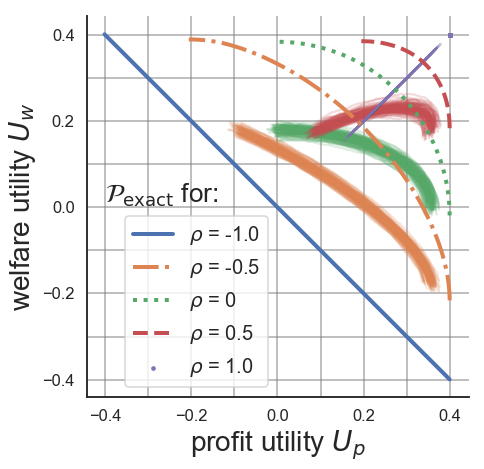

In [6]:
# correlated scores, uncorrelated noise.
num_full = 5000
feature_dim = 2

num_trials = 100

rs = np.random.RandomState(0)
noise_this = (0.,0.)
pop = e.Population(feature_dim, noise=noise_this, correlation=0, seed=0)
data = pop.get_samples(num_full, noise=noise_this)
X_full, yp, yw = data['X'], data['yp'].ravel(), data['yw'].ravel()


noise_p = .5
noise_w = 2.0

corrs = [-1.0, -0.5, 0, 0.5, 1.0]

alphas = np.linspace(0,1,num=101)

util_ps = np.zeros((len(corrs), len(alphas), num_trials))
util_ws = np.zeros((len(corrs), len(alphas), num_trials))
    
utils_p_opt = np.zeros((len(corrs), len(alphas)))
utils_w_opt = np.zeros((len(corrs), len(alphas)))
yw_show = []
yp_show = []

line_styles = ['solid', 'dashdot', 'dotted', 'dashed', None]
for i,corr in enumerate(corrs):
    
    pop = e.Population(feature_dim, noise=(0,0), correlation=corr, seed=0)
    
    for k in range(num_trials):
        ## generate finite populations
        feature_dim = 2
        
        # generatinig population data
        data = pop.get_samples(num_full)
        X_full, yp, yw = data['X'], data['yp'].ravel(), data['yw'].ravel()
    
        fphat = yp + noise_p*rs.randn(len(yp))
        fwhat = yw + noise_w*rs.randn(len(yw))
    
        # pareto frontier
        for j,alpha in enumerate(alphas):
        
            decision_rule = alpha*fwhat + (1-alpha)*fphat > 0 
            util_ps[i,j,k] = np.sum(yp[decision_rule])
            util_ws[i,j,k] = np.sum(yw[decision_rule])
            

        for j,alpha in enumerate(alphas):
            decision_rule_opt = alpha*yw + (1-alpha)*yp > 0 
            utils_p_opt[i,j] = np.sum(yp[decision_rule_opt])
            utils_w_opt[i,j] = np.sum(yw[decision_rule_opt])
            
fig, ax = plt.subplots(figsize=(7,7))

colors = sns.color_palette()


n = num_full
for i,corr in enumerate(corrs):    
    ax.plot(util_ps[i]/n, util_ws[i]/n, alpha=0.2,color=colors[i])    
    if i < len(corrs)-1:
        ax.plot(utils_p_opt[i]/n, utils_w_opt[i]/n, 
                lw=4, 
                ls = line_styles[i],
            label=r"$\rho$ = {0}".format(corr),color=colors[i],
                 
           zorder=3)

ax.scatter(utils_p_opt[-1]/n,utils_w_opt[-1]/n, 
           s=10,
           color=colors[len(corrs)-1], label=r"$\rho$ = {0}".format(corrs[-1]))
ax.set_aspect('equal')
sns.despine(ax=ax)

ax.legend(bbox_to_anchor=(0.5,0.5), frameon=True, prop={'size': 20})

ax.text(-.4, 0.01, r'$\mathcal{P}_{\mathrm{exact}}$ for:', fontsize=26)

minor_ticks = np.arange(-.4, .45, .1)
major_ticks = np.arange(-.4, .45, .2)
ax.set_xticks(major_ticks); ax.set_xticks(minor_ticks, minor= True)
ax.set_yticks(major_ticks); ax.set_yticks(minor_ticks, minor= True)


ax.set_xlabel(r"profit utility $U_p$", fontsize=28); 
ax.set_ylabel(r"welfare utility $U_w$", fontsize=28); 

ax.grid(b=True, which='minor', linewidth=2, color='gray', alpha=0.5)

if save_fig:
    plt.savefig('{0}/corr_scores_differing_noise.pdf'.format(fig_out_dir),bbox_inches='tight')